In [1]:
import numpy as np
import textwrap
from plotutils.radar import ComplexRadar


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import textwrap
import math

In [4]:
import pandas as pd
data = pd.read_csv('./exp_results/citation_node_cotrain.csv')

In [39]:
data.head()

,methods,Cora,CiteSeer,Pubmed,Arxiv,Arxiv-2023,History,Child,Photo,Computers,Sports,Products
0,OneForAll,72.58,65.43,66.70,71.81,73.30,83.30,56.22,85.05,87.83,92.29,86.91
1,GraphMAE,74.75,63.99,66.78,68.26,66.18,82.64,48.36,79.70,77.50,82.78,81.22
2,GraphLLM,81.09,67.92,74.32,75.94,75.94,83.30,54.45,85.40,87.00,91.40,89.00


In [40]:
methods = data['methods'].to_numpy()
print(methods)

['OneForAll' 'GraphMAE' 'GraphLLM']


In [41]:
real_data = data.iloc[:, 1:]

In [42]:
real_data.head()

,Cora,CiteSeer,Pubmed,Arxiv,Arxiv-2023,History,Child,Photo,Computers,Sports,Products
0,72.58,65.43,66.70,71.81,73.30,83.30,56.22,85.05,87.83,92.29,86.91
1,74.75,63.99,66.78,68.26,66.18,82.64,48.36,79.70,77.50,82.78,81.22
2,81.09,67.92,74.32,75.94,75.94,83.30,54.45,85.40,87.00,91.40,89.00


In [43]:
min_max_per_variable = real_data.describe().T[['min', 'max']]
min_max_per_variable['min'] = min_max_per_variable['min'].apply(lambda x: int(x))
min_max_per_variable['max'] = min_max_per_variable['max'].apply(lambda x: math.ceil(x))

variables = real_data.columns
ranges = list(min_max_per_variable.itertuples(index=False, name=None))   

In [44]:
ranges
ranges = [(x - 5, y) for x, y in ranges]

In [45]:
variables

Index(['Cora', 'CiteSeer', 'Pubmed', 'Arxiv', 'Arxiv-2023', 'History', 'Child',
       'Photo', 'Computers', 'Sports', 'Products'],
      dtype='object')

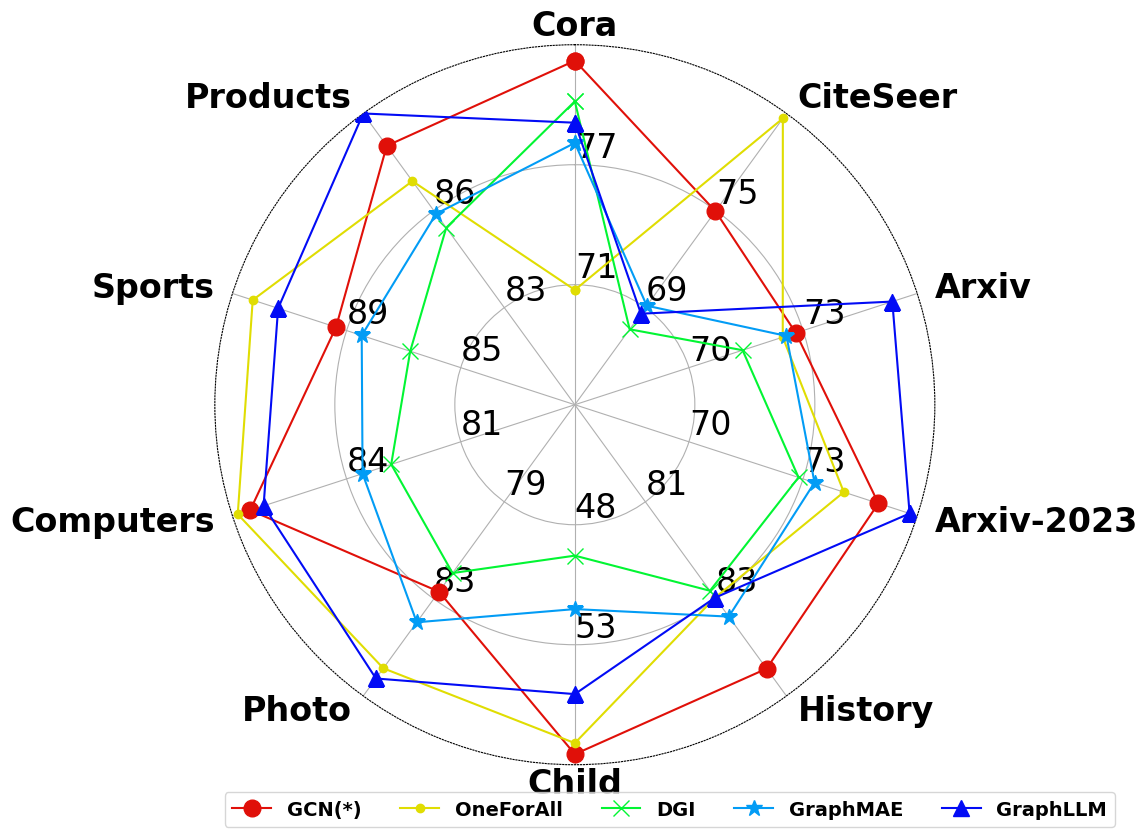

<Figure size 640x480 with 0 Axes>

In [3]:
from plotutils.radar import generate_radar_plots
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('./exp_results/citation_node_cotrain.csv')
aa = generate_radar_plots(data, bbox_pos=(-0.2, -0.13), legend_size=16, name='domain_node_cotrain')
# aa.show()
# aa.savefig('domain_node_cotrain.png')

In [7]:
data.iloc[0].tolist()

['OneForAll',
 72.58,
 65.43,
 66.7,
 71.81,
 73.3,
 83.3,
 56.22,
 85.05,
 87.83,
 92.29,
 86.91]

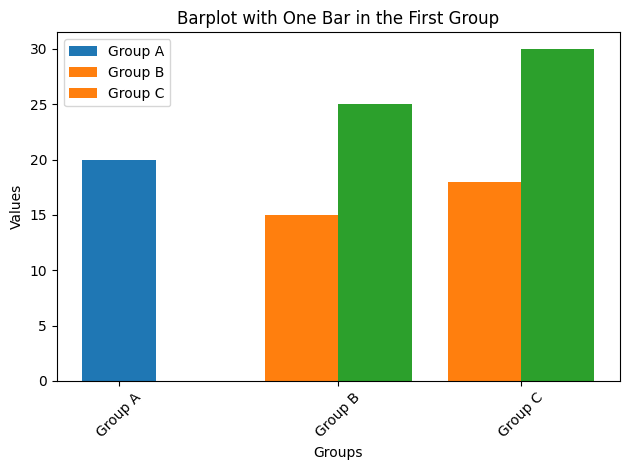

In [6]:
import matplotlib.pyplot as plt

# Sample data setup
data = {
    'Group A': [20],
    'Group B': [15, 25],
    'Group C': [18, 30]
}
groups = list(data.keys())
values = list(data.values())

# Calculate bar positions
n_groups = len(groups)
bar_width = 0.4
positions_group_1 = [bar_width / 2]
positions_other_groups = [i + bar_width for i in range(1, n_groups)]

# Plotting
fig, ax = plt.subplots()
ax.bar(positions_group_1, values[0], width=bar_width, color='tab:blue', label=groups[0])

for i in range(1, n_groups):
    ax.bar(positions_other_groups[i - 1] - bar_width/2, values[i][0], width=bar_width, color='tab:orange', label=groups[i])
    ax.bar(positions_other_groups[i - 1] + bar_width/2, values[i][1], width=bar_width, color='tab:green')

# Set ticks for first bar group
ax.set_xticks(positions_group_1 + positions_other_groups)
ax.set_xticklabels(groups, rotation=45)  # Rotate xtick labels by 45 degrees

# Labels, title, legend
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Barplot with One Bar in the First Group')
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


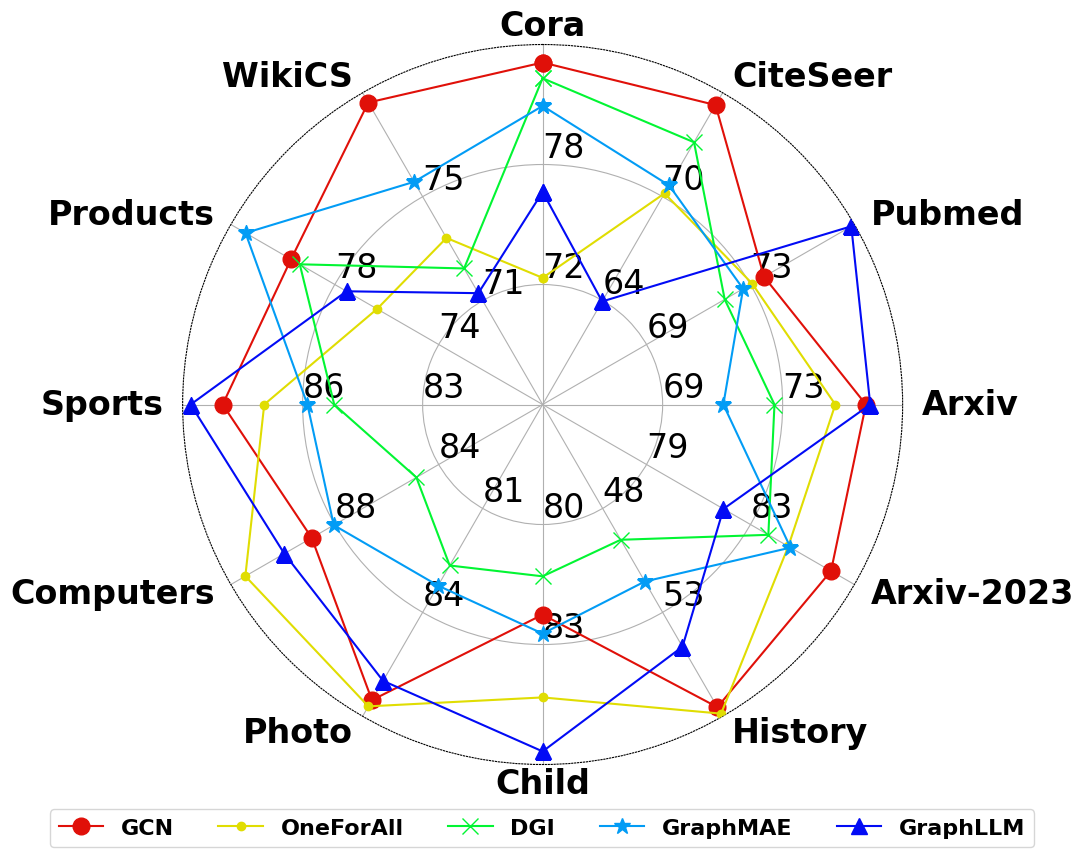

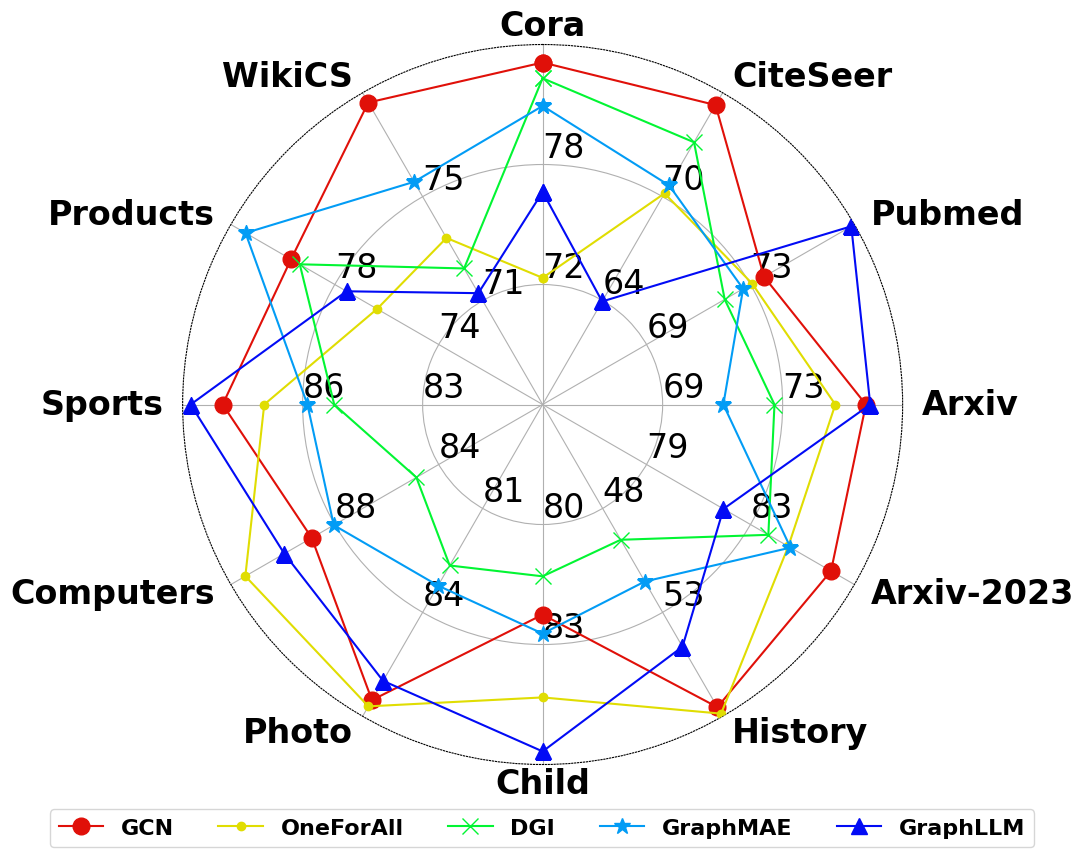

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
from plotutils.radar import generate_radar_plots
all_data = pd.read_csv('./exp_results/all_node_cotrain.csv')
generate_radar_plots(all_data, bbox_pos=(-0.2, -0.13), legend_size=16, name='all_node_cotrain')

In [8]:
import pandas as pd 

citation_avg = pd.read_csv('./exp_results/citation_node_avg.csv')


In [12]:
citation_avg.columns.to_list()[1:]

Index(['methods', 'Single task', 'In-domain', 'Cross-domain'], dtype='object')

<Axes: >

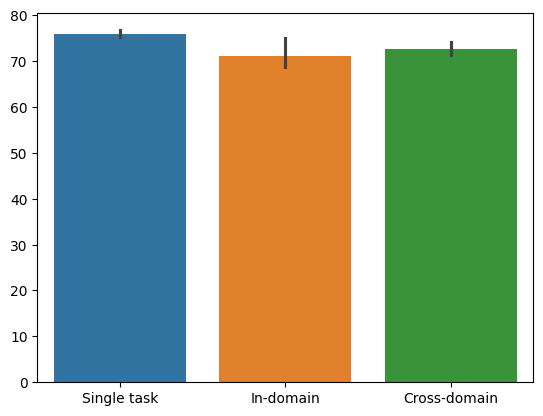

In [15]:
import seaborn as sns 

sns.barplot(data=citation_avg)

In [10]:
citation_avg.iloc[0].dropna().tolist()

['GCN', 77.026]

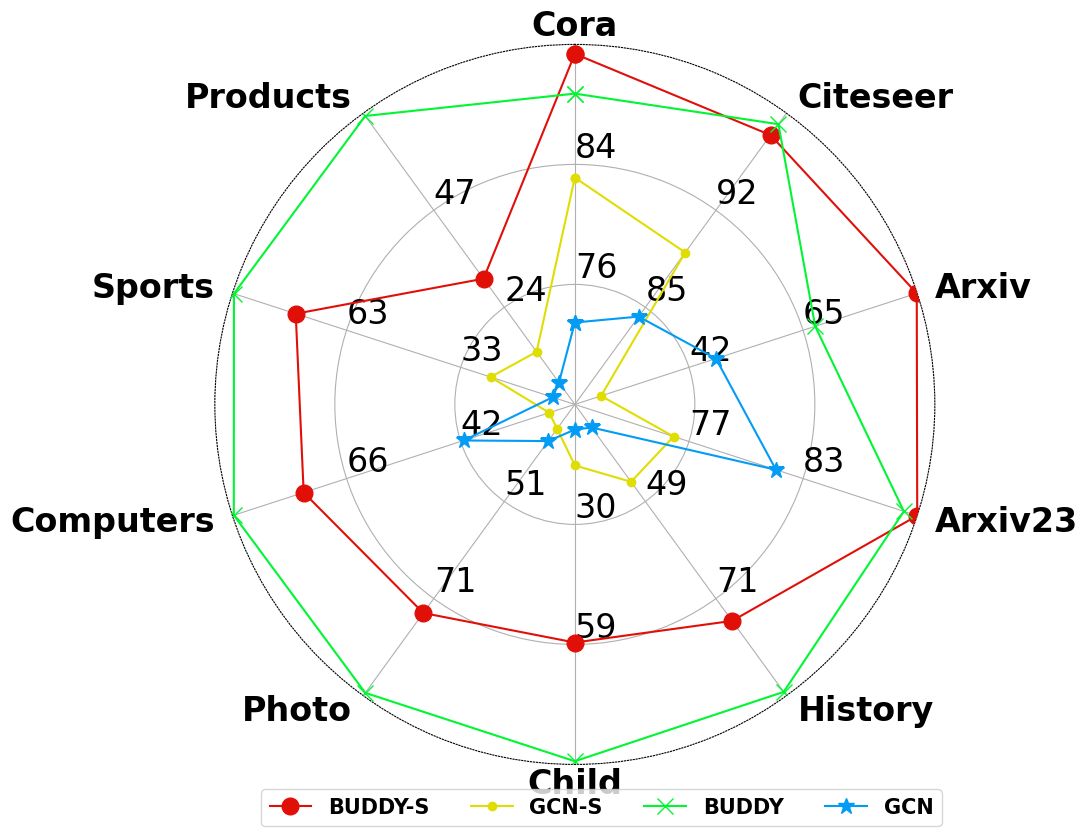

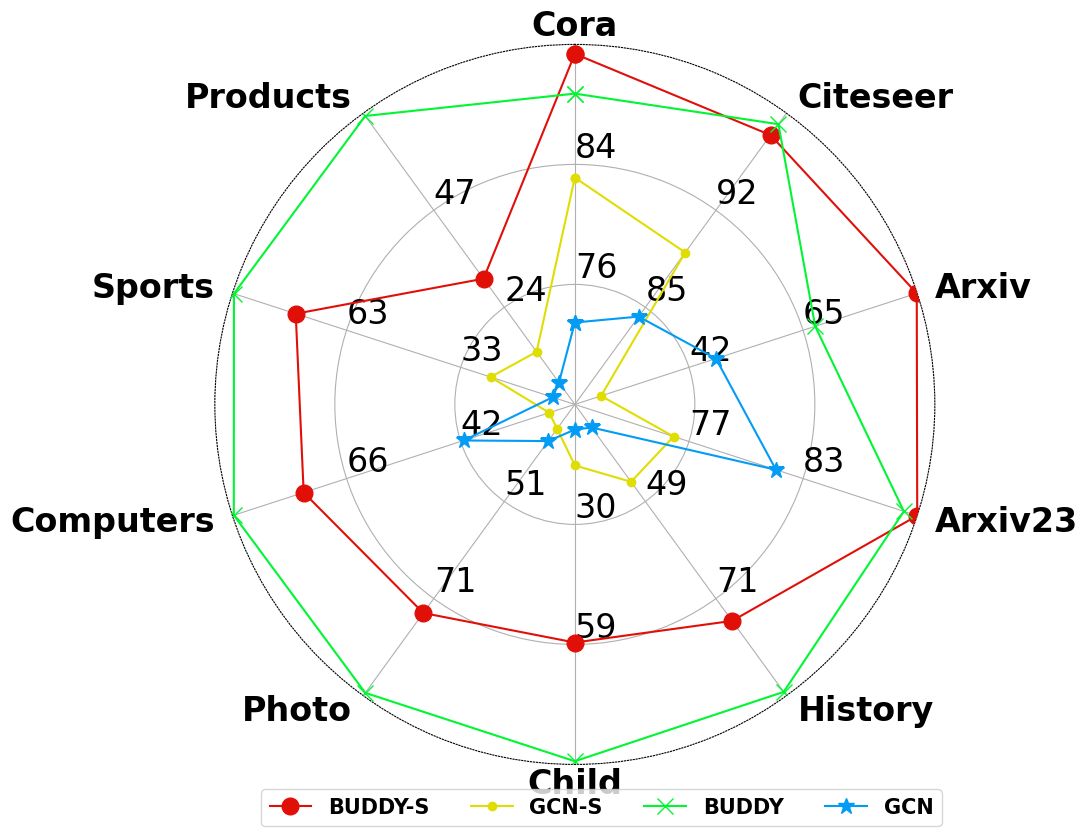

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
from plotutils.radar import generate_radar_plots
link = pd.read_csv('./exp_results/all_link_cotrain.csv')
generate_radar_plots(link, bbox_pos=(0.05, -0.1), legend_size=15)

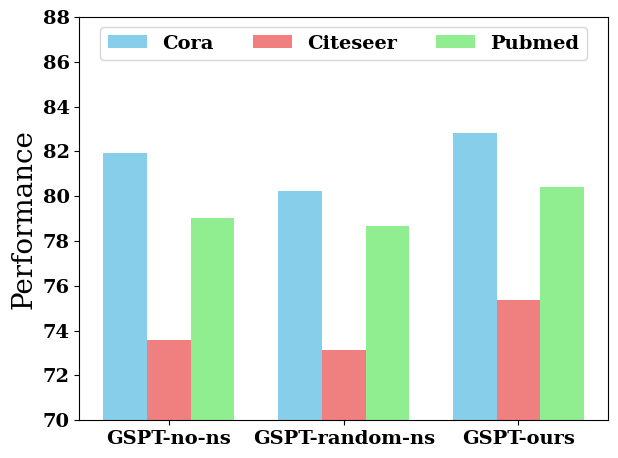

In [18]:
import seaborn as sns 
import pandas as pd 

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'serif'  # Or any font you prefer (e.g., 'Times New Roman', 'Helvetica')
plt.rcParams['font.size'] = 14         # Adjust the size as needed
plt.rcParams['font.weight'] = 'bold'    # Make all fonts bold

# Data
methods = ['GSPT-no-ns', 'GSPT-random-ns', 'GSPT-ours']
cora = [81.92, 80.24, 82.84]
citeseer = [73.6, 73.14, 75.35]
pubmed = [79.03, 78.65, 80.42]

# X-axis positions for bars
x = np.arange(len(methods))
width = 0.25  # Width of each bar

# Create figure and axes
fig, ax = plt.subplots()

# Plot the bars
rects1 = ax.bar(x - width, cora, width, label='Cora', color='skyblue')
rects2 = ax.bar(x, citeseer, width, label='Citeseer', color='lightcoral')
rects3 = ax.bar(x + width, pubmed, width, label='Pubmed', color='lightgreen')

# Add labels, title, and legend
ax.set_ylabel('Performance',fontsize=20)
# ax.set_title('Performance Comparison of GSPT Methods')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend(ncol=3, loc='upper center')
ax.set_ylim([70, 85])

# Function to add labels above the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the autolabel function for each set of bars
# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing

plt.savefig('abalation.pdf')
plt.savefig('abalation.png')


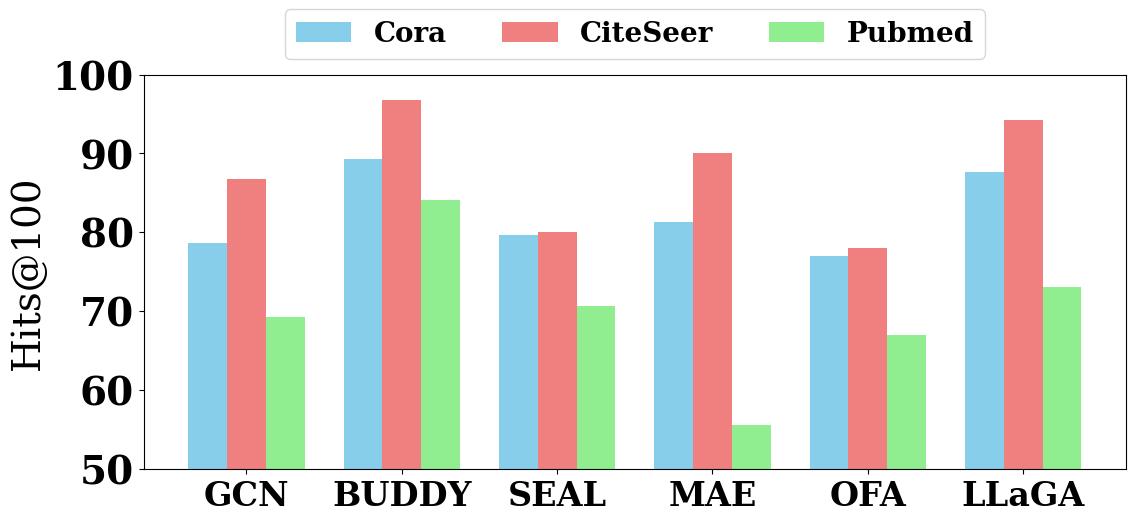

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['GCN', 'BUDDY', 'SEAL', 'MAE', 'OFA', 'LLaGA']
cora = [78.67, 89.29, 79.72, 81.33, 76.99, 87.7]
citeseer = [86.74, 96.8, 80, 90.06, 78.08, 94.3]
pubmed = [69.33, 84.05, 70.63, 55.62, 67.07, 73.1]

plt.rcParams['font.family'] = 'serif'  # Or any font you prefer (e.g., 'Times New Roman', 'Helvetica')
plt.rcParams['font.size'] = 28         # Adjust the size as needed
plt.rcParams['font.weight'] = 'bold' 

# X-axis positions for bars
x = np.arange(len(methods))  # Evenly spaced positions
width = 0.25                 # Width of each bar

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))  # Optional: Adjust figure size

# Plot the bars
rects1 = ax.bar(x - width, cora, width, label='Cora', color='skyblue')
rects2 = ax.bar(x, citeseer, width, label='CiteSeer', color='lightcoral')
rects3 = ax.bar(x + width, pubmed, width, label='Pubmed', color='lightgreen')

# Add labels, title, and legend
ax.set_ylabel('Hits@100', fontsize=28)
# ax.set_title('Performance Comparison of Methods Across Datasets', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=24)
ax.legend(fontsize=20, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.2))
# ax.yaxis.grid(axis='y', linestyle='--')
ax.set_axisbelow(True)
ax.set_ylim([50, 100])



# Show the plot
plt.tight_layout()
plt.savefig('smallink.pdf')
plt.savefig('smallink.png')
plt.show()


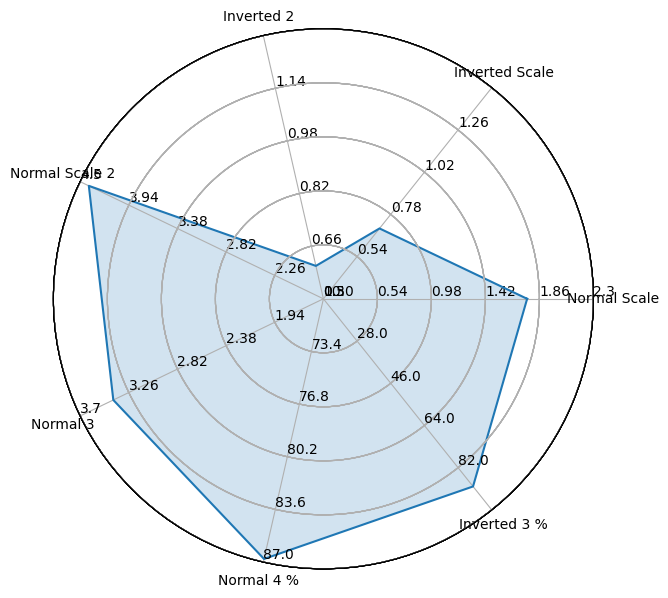

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data
variables = ("Normal Scale", "Inverted Scale", "Inverted 2", 
            "Normal Scale 2", "Normal 3", "Normal 4 %", "Inverted 3 %")
data = (1.76, 1.1, 1.2, 
        4.4, 3.4, 86.8, 20)
ranges = [(0.1, 2.3), (1.5, 0.3), (1.3, 0.5),
         (1.7, 4.5), (1.5, 3.7), (70, 87), (100, 10)]            
# plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data)
radar.fill(data, alpha=0.2)
plt.savefig('radar_test.png')
plt.show()    

In [11]:
import os
import torch
from torch_geometric.utils import to_undirected
path = "/egr/research-dselab/chenzh85/nips/MyOFA/cache_data_minilm"
for dir in os.listdir(path):
    try:
        ppath = os.path.join(path, dir, 'processed', 'geometric_data_processed.pt')
        pygobj = torch.load(ppath)[0]
        edge_index = to_undirected(pygobj.edge_index)
        if hasattr(pygobj, 'x'):
            x = pygobj.x
        else:
            x = pygobj.node_text_feat
        if hasattr(pygobj, 'node_embs'):
            nodes = x.shape[0]
            ng = pygobj.y.shape[0]
            nodes = nodes / ng 
            edges = edge_index.shape[1] / ng
        else:
            nodes = x.shape[0]
            edges = edge_index.shape[1]
        classes = pygobj.y.max().item() + 1
        print(f"nodes: {nodes}, edges: {edges}, classes: {classes}, name: {dir}")
    except Exception as e:
        print(e)

nodes: 0.20285408663965482, edges: 0.00015060473538751568, classes: nan, name: chempcba
nodes: 34.08922670191672, edges: 1.3390614672835426, classes: 2.0, name: bace
'NoneType' object has no attribute 'max'
nodes: 19717, edges: 88648, classes: 3, name: pubmed
'NoneType' object has no attribute 'shape'
nodes: 169343, edges: 2315598, classes: 5, name: arxivyear
'NoneType' object has no attribute 'shape'
nodes: 316513, edges: 19337745, classes: 39, name: products
'NoneType' object has no attribute 'shape'
nodes: 169343, edges: 2315598, classes: 40, name: arxiv
'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'
nodes: 0.01997536559580355, edges: 9.9000099000099e-06, classes: nan, name: chemblpre
'NoneType' object has no attribute 'shape'
nodes: 1.5478972459881666, edges: 0.03720257097858937, classes: nan, name: tox21
nodes: 11701, edges: 431726, classes: 10, name: wikics
nodes: 1.4255140194593419, edges: 0.0009630459551122005, classes: nan, name: muv
node

In [2]:
import torch
aaa = torch.load("/egr/research-dselab/chenzh85/nips/MyOFA/cache_data_minilm/muv/processed/geometric_data_processed.pt")

/egr/research-dselab/chenzh85/envs/acl24/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
aaa

(Data(x=[2255846], edge_index=[2, 4892252], y=[1582479], xe=[4892252], node_embs=[65, 384], edge_embs=[11, 384], class_node_text_feat=[34, 384], prompt_edge_text_feat=[3, 384], noi_node_text_feat=[2, 384]),
 {'x': tensor([      0,      26,      50,  ..., 2255801, 2255822, 2255846]),
  'edge_index': tensor([      0,      60,     112,  ..., 4892158, 4892202, 4892252]),
  'y': tensor([      0,      17,      34,  ..., 1582445, 1582462, 1582479]),
  'xe': tensor([      0,      60,     112,  ..., 4892158, 4892202, 4892252])})

In [7]:
ddd = torch.load("/egr/research-dselab/chenzh85/nips/MyOFA/cache_data_minilm/dblp/processed/geometric_data_processed.pt")
ddd
ddd[0].y.max().item() + 1

4

In [21]:
from torch_geometric.utils import remove_self_loops
for x in ["dblp"]:
    ttt = torch.load(f"/egr/research-dselab/chenzh85/nips/MyOFA/cache_data_minilm/{x}/processed/geometric_data_processed.pt")
    ttt = ttt[0]
    ttt.edge_index = to_undirected(ttt.edge_index)
    ttt.edge_index = remove_self_loops(ttt.edge_index)[0]
    print(ttt)
    print(ttt.y.max().item() + 1)   


Data(edge_index=[2, 431326], y=[14376], train_mask=[14376], val_mask=[14376], test_mask=[14376], node_text_feat=[14376, 384], edge_text_feat=[1, 384], noi_node_text_feat=[2, 384], class_node_text_feat=[6, 384], prompt_edge_text_feat=[3, 384])
4


In [41]:
for x in ["tox21", "muv", "bace", "bbbp", "chempcba", "chemhiv", "toxcast"]:
    tox = torch.load(f"/egr/research-dselab/chenzh85/nips/MyOFA/cache_data_minilm/{x}/processed/geometric_data_processed.pt")[0]
    nl = tox.class_node_text_feat.shape[0] // 2
    nx = tox.x.shape[0]
    num = tox.y.shape[0] // nl 
    nfeat = tox.x.shape[0] // num
    # tox.edge_index = to_undirected(tox.edge_index)
    # tox.edge_index = remove_self_loops(tox.edge_index)[0]
    nedge = tox.edge_index.shape[1] // num
    data = torch.load(f"/egr/research-dselab/chenzh85/nips/MyOFA/cache_data_minilm/{x}/processed/data.pt")
    train = data[0]['train']
    valid = data[0]['valid']
    test = data[0]['test']
    num_of_sampels = max(max(train), max(valid), max(test)) + 1
    print(f"dataset: {x}, {num_of_sampels}, number of labels: {nl}, avg nodes: {tox.x.shape[0] / num_of_sampels}, avg edges: {tox.edge_index.shape[1] / num_of_sampels}")

dataset: tox21, 7831, number of labels: 12, avg nodes: 18.574766951858, avg edges: 38.588941386796066
dataset: muv, 93087, number of labels: 17, avg nodes: 24.233738330808812, avg edges: 52.55569520985745
dataset: bace, 1513, number of labels: 1, avg nodes: 34.08922670191672, avg edges: 73.71844018506279
dataset: bbbp, 2039, number of labels: 1, avg nodes: 24.064737616478666, avg edges: 51.9087788131437
dataset: chempcba, 437092, number of labels: 128, avg nodes: 25.965323089875817, avg edges: 56.20338052400867
dataset: chemhiv, 41127, number of labels: 1, avg nodes: 25.510321686483334, avg edges: 54.93656235563012
dataset: toxcast, 8575, number of labels: 588, avg nodes: 18.775743440233235, avg edges: 38.50495626822158


In [30]:
k = torch.load("/egr/research-dselab/chenzh85/nips/MyOFA/cache_data_minilm/bace/processed/data.pt")

1512

In [34]:
tox

Data(x=[1049163], edge_index=[2, 2259376], y=[41127], xe=[2259376], node_embs=[382, 384], edge_embs=[8, 384], class_node_text_feat=[2, 384], prompt_edge_text_feat=[3, 384], noi_node_text_feat=[2, 384])

In [3]:
import os.path as osp 
import torch
from torch_geometric.utils import homophily

path = "/egr/research-dselab/chenzh85/nips/MyOFA/cache_data_minilm"

datasets = ['cora', 'citeseer', 'arxiv', 'arxiv23', 'bookhis', 'bookchild', 'elecomp', 'elephoto', 'sportsfit', 'products', 'pubmed', 'wikics', 'tolokers', 'amazonratings']

for dataset in datasets:
    try:
        data = torch.load(osp.join(path, dataset, 'processed', 'geometric_data_processed.pt'))[0]
        homo = homophily(data.edge_index, data.y.view(-1))
        print(f"dataset: {dataset}, homophily ratio: {homo}")
    except Exception as e:
        print(f"dataset: {dataset}, {e}")

dataset: cora, homophily ratio: 0.8099659085273743
dataset: citeseer, homophily ratio: 0.784142017364502
dataset: arxiv, homophily ratio: 0.6550830602645874
dataset: arxiv23, homophily ratio: 0.6465218663215637
dataset: bookhis, homophily ratio: 0.6625968217849731
dataset: bookchild, homophily ratio: 0.4219524562358856
dataset: elecomp, homophily ratio: 0.8322324156761169
dataset: elephoto, homophily ratio: 0.749139130115509
dataset: sportsfit, homophily ratio: 0.9003828763961792
dataset: products, homophily ratio: 0.8081300258636475
dataset: pubmed, homophily ratio: 0.8023869395256042
dataset: wikics, homophily ratio: 0.6547393202781677
dataset: tolokers, homophily ratio: 0.5945221781730652
dataset: amazonratings, homophily ratio: 0.3803761303424835
